Mean square error, B0 = -0.0026415350672004665, B1 = 0.4551328580587909
Mean absolute error, B0 = -1.0712501266512582, B1 = 0.871434604551989
The mean square error = 0.49080972730885286
The mean absolute error = 1.1367118667629308


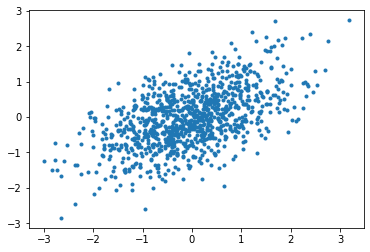

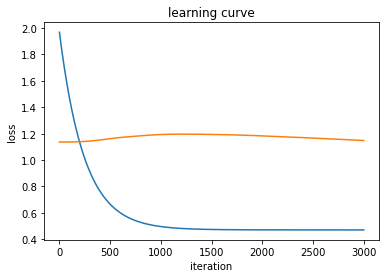

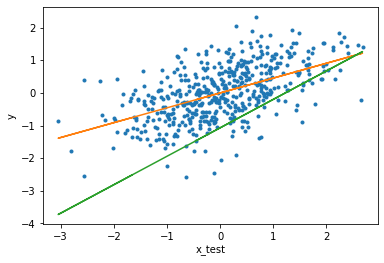

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# # Load data
# Read data from the file
train_data = np.loadtxt('train_data.csv', delimiter=',', skiprows=1)

x_train = np.zeros((train_data.shape[0], 1))
t_train = np.zeros((train_data.shape[0], 1))
x_train[:, 0] = train_data[:, 0]
t_train[:, 0] = train_data[:, 1]  # target value

# Plot
plt.plot(x_train, t_train, '.')


# # Initialization
w_init = np.random.normal(0, np.std(x_train), 2)
#w_init = np.zeros(2)
learning_rate = 1e-3
# Assume my linear regression function is y = b0 + b1x
epoch = 3000


# # Gradient Descent
# To calculate the gradient with the mean square error as objective function
def grad_MSE(x, y, y_pred, b0, b1):
    db0 = np.sum(-2 * (y - y_pred)) / x.shape[0]
    db1 = np.sum(-2 * np.multiply(x, (y - y_pred))) / x.shape[0]
    b0 = b0 - db0 * learning_rate
    b1 = b1 - db1 * learning_rate
    return b0, b1


# To calculate the gradient with the mean absolute error as objective function
def grad_MAE(x, y, y_pred, b0, b1):
    db0 = np.zeros(x.shape[0])
    db1 = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        if (y_pred[i] > y[i]):
            db0[i] = 1
            db1[i] = x[i, 0]
        elif (y_pred[i] < y[i]):
            db0[i] = -1
            db1[i] = -x[i, 0]
        else:
            db0[i] = 0
            db1[i] = 0
    b0 = b0 - b0 * np.sum(db0) * learning_rate / x.shape[0]
    b1 = b1 - b1 * np.sum(db1) * learning_rate / x.shape[0]
    return b0, b1


# To calculate the mean square error
def MSE(y, y_pred):
    loss = np.sum(np.power((y - y_pred), 2)) / y.shape[0]
    return loss


# To calculate the mean absolute error
def MAE(y, y_pred):
    loss = np.sum(np.absolute(y - y_pred)) / y.shape[0]
    return loss


b0_MSE, b1_MSE = w_init[0], w_init[1]
b0_MAE, b1_MAE = w_init[0], w_init[1]
loss_MSE = np.zeros(epoch)
loss_MAE = np.zeros(epoch)
for i in range(epoch):
    y_predict_MSE = b0_MSE * np.ones((x_train.shape[0], 1)) + b1_MSE * x_train
    y_predict_MAE = b0_MAE * np.ones((x_train.shape[0], 1)) + b1_MAE * x_train
    loss_MSE[i] = MSE(t_train, y_predict_MSE)
    loss_MAE[i] = MAE(t_train, y_predict_MAE)
    b0_MSE, b1_MSE = grad_MSE(x_train, t_train, y_predict_MSE, b0_MSE, b1_MSE)
    b0_MAE, b1_MAE = grad_MAE(x_train, t_train, y_predict_MSE, b0_MAE, b1_MAE)

# # Plot the Learning Curve

plt.figure()
plt.title('learning curve')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(np.arange(epoch), loss_MSE)
plt.plot(np.arange(epoch), loss_MAE)


# # Test
test_data = np.loadtxt('test_data.csv', delimiter=',', skiprows=1)

x_test = np.zeros((test_data.shape[0], 1))
t_test = np.zeros((test_data.shape[0], 1))
x_test[:, 0] = test_data[:, 0]
t_test[:, 0] = test_data[:, 1]  # target value

test_predict_MSE = b0_MSE * np.ones((x_test.shape[0], 1)) + b1_MSE * x_test
test_predict_MAE = b0_MAE * np.ones((x_test.shape[0], 1)) + b1_MAE * x_test

print(f'Mean square error, B0 = {b0_MSE}, B1 = {b1_MSE}')
print(f'Mean absolute error, B0 = {b0_MAE}, B1 = {b1_MAE}')
print(f'The mean square error = {MSE(t_test, test_predict_MSE)}')
print(f'The mean absolute error = {MAE(t_test, test_predict_MAE)}')

plt.figure()
plt.plot(x_test, t_test, '.')
plt.xlabel('x_test')
plt.ylabel('y')
plt.plot(x_test, test_predict_MSE)
plt.plot(x_test, test_predict_MAE)
plt.show()


In [2]:
print(x_train.shape)
print(t_train.shape)

(1000, 1)
(1000, 1)
